Consider the following Python dictionary `data` and Python list `labels`:

``` python
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
```

**1.** Create a DataFrame `df` from this dictionary `data` which has the index `labels`.

In [464]:
import pandas as pd
import numpy as np

data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
df= pd.DataFrame(data, index=labels)
df

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,2.0,3,no
g,snake,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


**2.** Display a summary of the basic information about this DataFrame and its data (*hint: there is a single method that can be called on the DataFrame*).

In [467]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, a to j
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   animal    10 non-null     object 
 1   age       8 non-null      float64
 2   visits    10 non-null     int64  
 3   priority  10 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 400.0+ bytes


**3.** Return the first 3 rows of the DataFrame `df`.

In [469]:
df[:3]

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no


**4.** Display the 'animal' and 'age' columns from the DataFrame `df`

In [471]:
df[['animal','age']]

,animal,age
a,cat,2.5
b,cat,3.0
c,snake,0.5
d,dog,NaN
e,dog,5.0
f,cat,2.0
g,snake,4.5
h,cat,NaN
i,dog,7.0
j,dog,3.0


**5.** Display the data in rows `[3, 4, 8]` *and* in columns `['animal', 'age']'

In [473]:
df[['animal','age']].loc[['d','e','i']]

,animal,age
d,dog,NaN
e,dog,5.0
i,dog,7.0


**6.** Select only the rows where the number of visits is greater than 3.

In [476]:
print("Rows where the number of visits is greater than 3.")
df[df['visits']>3]

Rows where the number of visits is greater than 3.


,animal,age,visits,priority


**7.** Select the rows where the age is missing, i.e. it is `NaN`.

In [478]:
print("Rows where the age is missing.")
df[df['age'].isnull()]

Rows where the age is missing.


,animal,age,visits,priority
d,dog,NaN,3,yes
h,cat,NaN,1,yes


**8.** Select the rows where the animal is a cat *and* the age is less than 3.

In [481]:
df=df.fillna(0)

In [482]:
print("Rows where the animal is a cat and the age is less than 3.")
df[(df['animal']=='cat') &((df['age']<3)& df['age']>0)]

Rows where the animal is a cat and the age is less than 3.


,animal,age,visits,priority
a,cat,2.5,1,yes
f,cat,2.0,3,no


**9.** Select the rows where the age is between 2 and 4 (inclusive)

In [484]:
print('rows where the age is between 2 and 4')
df[(df['age']>=2) & (df['age']<=4)]

rows where the age is between 2 and 4


,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
f,cat,2.0,3,no
j,dog,3.0,1,no


**10.** Change the age in row 'f' to 1.5.

In [486]:
df=df.replace(df.loc['f']['age'],1.5)
df

,animal,age,visits,priority
a,cat,2.5,1.0,yes
b,cat,3.0,3.0,yes
c,snake,0.5,1.5,no
d,dog,0.0,3.0,yes
e,dog,5.0,1.5,no
f,cat,1.5,3.0,no
g,snake,4.5,1.0,no
h,cat,0.0,1.0,yes
i,dog,7.0,1.5,no
j,dog,3.0,1.0,no


**11.** Calculate the sum of all visits in `df` (i.e. the total number of visits).

In [488]:
print('total number of visits =',df['visits'].sum())

total number of visits = 17.5


**12.** Calculate the mean age for each different animal in `df`.

In [490]:
print('Mean age for different animals is:\n ')
df.groupby('animal')['age'].mean()

Mean age for different animals is:
 


animal
cat      1.75
dog      3.75
snake    2.50
Name: age, dtype: float64

**13.** Append a new row 'k' to `df` with your choice of values for each column. Then delete that row to return the original DataFrame.

In [492]:
new_row=pd.DataFrame({'animal': ' lion','age':3,'visits':5,'priority':'yes'},index=['k'])
df4=pd.concat([df,new_row])
df4

,animal,age,visits,priority
a,cat,2.5,1.0,yes
b,cat,3.0,3.0,yes
c,snake,0.5,1.5,no
d,dog,0.0,3.0,yes
e,dog,5.0,1.5,no
f,cat,1.5,3.0,no
g,snake,4.5,1.0,no
h,cat,0.0,1.0,yes
i,dog,7.0,1.5,no
j,dog,3.0,1.0,no


**14.** Count the number of each type of animal in `df`.

In [494]:
df.groupby('animal').count()

,age,visits,priority
animal,,,
cat,4,4,4
dog,4,4,4
snake,2,2,2


**15.** Sort `df` first by the values in the 'age' in *decending* order, then by the value in the 'visits' column in *ascending* order (so row `i` should be first, and row `d` should be last).

In [519]:
df3= (df.sort_values(by='age', ascending=False)).sort_values(by='visits')
df3

,animal,age,visits,priority
g,snake,4.5,1.0,no
j,dog,3.0,1.0,no
a,cat,2.5,1.0,yes
h,cat,0.0,1.0,yes
i,dog,7.0,1.5,no
e,dog,5.0,1.5,no
c,snake,0.5,1.5,no
b,cat,3.0,3.0,yes
f,cat,1.5,3.0,no
d,dog,0.0,3.0,yes


**16.** The 'priority' column contains the values 'yes' and 'no'. Replace this column with a column of boolean values: 'yes' should be `True` and 'no' should be `False`.

In [525]:
df=df.replace('yes',1)
df=df.replace('no',0)
df


C:\Users\GAUTHAM NAIR\AppData\Local\Temp\ipykernel_10628\88430669.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df=df.replace('no',0)


,animal,age,visits,priority
a,cat,2.5,1.0,1
b,cat,3.0,3.0,1
c,snake,0.5,1.5,0
d,dog,0.0,3.0,1
e,dog,5.0,1.5,0
f,cat,1.5,3.0,0
g,snake,4.5,1.0,0
h,cat,0.0,1.0,1
i,dog,7.0,1.5,0
j,dog,3.0,1.0,0


**17.** In the 'animal' column, change the 'snake' entries to 'python'.

In [527]:
df=df.replace('snake','python')
df

,animal,age,visits,priority
a,cat,2.5,1.0,1
b,cat,3.0,3.0,1
c,python,0.5,1.5,0
d,dog,0.0,3.0,1
e,dog,5.0,1.5,0
f,cat,1.5,3.0,0
g,python,4.5,1.0,0
h,cat,0.0,1.0,1
i,dog,7.0,1.5,0
j,dog,3.0,1.0,0


**18.** Load the ny-flights dataset to Python

In [652]:
ny_flights=pd.read_csv("ny-flights.csv")
ny_flights

,fl_date,unique_carrier,airline_id,tail_num,fl_num,origin,dest,dep_time,dep_delay,arr_time,arr_delay,cancelled,arr,dep
0,2014-01-01 00:00:00,AA,19805,N338AA,1,JFK,LAX,914.0,14.0,1238.0,13.0,0.0,2014-01-01 12:38:00,2014-01-01 09:14:00
1,2014-01-01 00:00:00,AA,19805,N335AA,3,JFK,LAX,1157.0,-3.0,1523.0,13.0,0.0,2014-01-01 15:23:00,2014-01-01 11:57:00
2,2014-01-01 00:00:00,AA,19805,N327AA,21,JFK,LAX,1902.0,2.0,2224.0,9.0,0.0,2014-01-01 22:24:00,2014-01-01 19:02:00
3,2014-01-01 00:00:00,AA,19805,N3EHAA,29,LGA,PBI,722.0,-8.0,1014.0,-26.0,0.0,2014-01-01 10:14:00,2014-01-01 07:22:00
4,2014-01-01 00:00:00,AA,19805,N319AA,117,JFK,LAX,1347.0,2.0,1706.0,1.0,0.0,2014-01-01 17:06:00,2014-01-01 13:47:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20812,2014-01-31 00:00:00,UA,19977,N54711,1253,ROC,ORD,801.0,-4.0,908.0,4.0,0.0,2014-01-31 09:08:00,2014-01-31 08:01:00
20813,2014-01-31 00:00:00,UA,19977,N77525,1429,LGA,CLE,1522.0,-10.0,1649.0,-31.0,0.0,2014-01-31 16:49:00,2014-01-31 15:22:00
20814,2014-01-31 00:00:00,UA,19977,N37293,1456,LGA,IAH,719.0,-6.0,1006.0,-20.0,0.0,2014-01-31 10:06:00,2014-01-31 07:19:00
20815,2014-01-31 00:00:00,UA,19977,N24729,1457,LGA,IAH,852.0,7.0,1156.0,-6.0,0.0,2014-01-31 11:56:00,2014-01-31 08:52:00


**19.** Which airline ID is present maximum times in the dataset

In [655]:
l=ny_flights.groupby(['airline_id']).count().sort_values(by='fl_date', ascending=False)
print("Arline with maxtimum presence in dataset is : ID ",l.index[0])

Arline with maxtimum presence in dataset is : ID  20409


**20.** Draw a plot between dep_delay and arr_delay

In [675]:
x=ny_flights['dep_delay'].fillna(0)
y=ny_flights['arr_delay'].fillna(0)

df_4_plot=pd.DataFrame({"dep_delay" : x, "arr_delay" : y })
df_4_plot=df_4_plot.sort_values(by='dep_delay')

In [677]:
df_4_plot

,dep_delay,arr_delay
13656,-112.0,-112.0
15847,-28.0,26.0
12304,-25.0,-39.0
8540,-23.0,-34.0
13155,-22.0,-28.0
...,...,...
4438,613.0,630.0
1840,784.0,788.0
18356,837.0,930.0
4410,881.0,870.0


C:\Users\GAUTHAM NAIR\AppData\Local\Temp\ipykernel_10628\2331962281.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


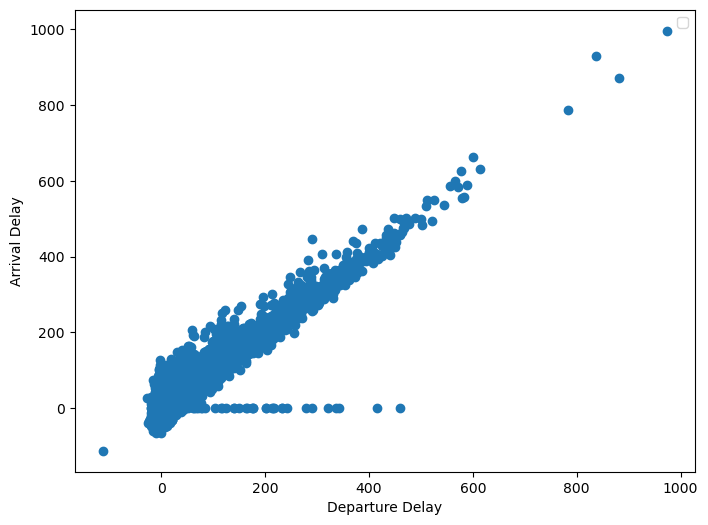

In [689]:
import matplotlib.pyplot as plt


x= list(df_4_plot['dep_delay'])
y= list(df_4_plot['arr_delay'])
plt.figure(figsize=(8,6))

plt.scatter(x,y)
#plt.bar(x,y,ec='g',fc='r', label="item2",linestyle=":",alpha=0.8,width=0.2)# Alpha is the transparency arg.useful for overlaping plots
plt.xlabel('Departure Delay')
plt.ylabel('Arrival Delay')
plt.legend()
#plt.savefig("demo21 chart.png")
plt.show()
